## Final Project Appendix


In [33]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random

import seaborn as sns

In [34]:
text_data = 'fake_or_real_news.csv'
text_df = pd.read_csv('fake_or_real_news.csv')

text_df.head()

# text_df.iloc[6330].text

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [35]:
#2020 data 
text_df2020_true = pd.read_csv('True.csv')
text_df2020_fake = pd.read_csv('Fake.csv')

text_df2020_true['label'] = 0
text_df2020_fake['label'] = 1

display(text_df2020_true.head())
display(text_df2020_fake.head())

files = [text_df2020_true, text_df2020_fake]

# combined_df2020 = pd.concat( [ pd.read_csv(f) for f in filenames ] )

combined_df2020 = pd.concat( [ f for f in files ] )



,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [36]:
#shuffle_df2020 = combined_df2020[:]

shuffle_df2020 = combined_df2020.sample(frac = 1)

#random.shuffle(shuffle_df2020)

shuffle_df2020 = shuffle_df2020.drop(columns=['subject', 'date'])
#df.drop(columns=['B', 'C'])

In [37]:
shuffle_df2020

,title,text,label
2364,‘Hundreds’ Donated To Planned Parenthood In R...,People have figured out a way to troll a right...,1
5603,Revamping Dodd-Frank a 'this-year priority': U...,WASHINGTON (Reuters) - The chairman of the U.S...,0
8844,U.S. House speaker asks that Clinton be denied...,WASHINGTON (Reuters) - Top Republicans in the ...,0
759,Congressional Black Caucus: Jeff Sessions Has...,The Congressional Black Caucus is a very influ...,1
4042,U.S. Senate panel votes in favor of Gottlieb t...,(Reuters) - A U.S. Senate committee voted on T...,0
...,...,...,...
14001,WHOA! FORMER DEMOCRAT CONGRESSWOMAN Reveals Hi...,Dr. Cynthia McKinney reveals Hillary s murdero...,1
14382,FOX NEWS FREEFALL? BILL O’REILLY Loses Kids Fo...,FOX News has seen their ratings take a nose-di...,1
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,1
11159,U.S. immigration case could set limits on pres...,WASHINGTON (Reuters) - The U.S. Supreme Court ...,0


### Data Preprocessing

In [38]:
#we want to filter out empty stories (keep only len texts > 0

# text_df.drop(labels=['id','title'], axis='columns', inplace=True)

# mask = list(text_df['text'].apply(lambda x: len(x) > 0))
# df = text_df[mask]

#2020 data 

# shuffle_df2020.drop(labels=['id','title'], axis='columns', inplace=True)

# mask = list(text_df['text'].apply(lambda x: len(x) > 0))
# df = text_df[mask]



In [39]:
text_col = text_df['text']
y_labels = text_df['label']

display(y_labels)
# text_col[1]

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [40]:
#2020 data 
y_labels2020 = shuffle_df2020['label']

y_labels2020

2364     1
5603     0
8844     0
759      1
4042     0
        ..
14001    1
14382    1
23472    1
11159    0
21378    0
Name: label, Length: 44898, dtype: int64

In [41]:
#encoding y_labels truth/fake column to binary values 
y_labels = []

for n in text_df['label']:
    if n == 'REAL': 
        y_labels.append(0)
    else: 
        y_labels.append(1)
        
text_df['binary'] = y_labels
text_df

y_labels = y_labels[0:20]

print(len(y_labels))

20


In [42]:
#sorting into real and fake news datasets 
true_df2016 = text_df[text_df.binary !=1] #keeps only records not equaling false 

fake_df2016 = text_df[text_df.binary !=0]

true_df2016.head()
fake_df2016.head()

,id,title,text,label,binary
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,1
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,1


In [43]:
true_df2020 = shuffle_df2020[shuffle_df2020.label !=1] #keeps only records not equaling false 

fake_df2020 = shuffle_df2020[shuffle_df2020.label !=0]

true_df2020.head()
fake_df2020.head()

,title,text,label
2364,‘Hundreds’ Donated To Planned Parenthood In R...,People have figured out a way to troll a right...,1
759,Congressional Black Caucus: Jeff Sessions Has...,The Congressional Black Caucus is a very influ...,1
17333,BAIL DENIED: CONVICTED MUSLIM RAPIST Refuses M...,"Apparently, keeping a slave and repeatedly rap...",1
14999,CNBC DEBATE HACK Proves Allegiance To Democrat...,By looking at the two Democrat presidential ca...,1
14930,New Orleans “Club” Advertises “Meet And Greet”...,"Wow it looks like Dem candidate for governor, ...",1


In [44]:
#sample data for dev, comment out at the end 

text_col = text_df['text'][0:20]
y_tf_labels = text_df['label'][0:20]


print(len(y_tf_labels))

20


In [45]:
text_col2020 = shuffle_df2020['text'][0:20]
y_labels2020 = shuffle_df2020['label'][0:20]
print(len(y_labels2020))

20


In [46]:
def word_stats(data, n=20):
    '''
    Print total wordcount and n top terms.
    Takes a Counter object and a number of terms to print.
    Returns None.
    '''
    print('Total words in the text:', sum(data.values()))
    
    print('\nTop X num words by frequency:')
    for word in data.most_common(20):
        print(word[0], '\t', word[1])
    return None

In [47]:
# Install spaCy
!conda install -c conda-forge spacy spacy-lookups-data -y
!python -m spacy download en_core_web_sm

Solving environment: done

# All requested packages already installed.

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [48]:
# tokenize words (pset 2 tokenization, lemmatization, pset 6 classification)
# for loop over text column, 

from collections import Counter
from nltk import word_tokenize

from nltk.corpus import stopwords
import string
import re
import spacy


### Lematization

In [49]:
# Write a preprocessor: tokenize and lemmatize as indicated

#need a Doc or Span or Dict(true) obj in place of text_col
# from spacy import displacy
# displacy.render(text_col, style='dep', options={'distance':100}) # Dependency parse


In [50]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')


def lemmatizer(text):
    lemm_tokens = []
    
    #initialize to empty string 
    lemm_text_str = '' #space separated words, then use tfidif on this 
    
    doc = nlp(text)
    
    for token in doc:
        if len(token) >0:
            if len(token.lemma_.strip())>0:
                if token.pos_ != "PUNCT":
                    if token.is_stop==False:
                        if token.is_alpha==True:
#                         lemm_text_str + token.orth_ + ' '
                            lemm_tokens.append(token.lemma_)


                        #join each token to string with space 

    #return lemm_text_str
    return lemm_tokens

# #rewrite function, takes in df col of text, returns 
# #OR use pandas apply method to the column, will incr apply 
# #over col with old raw texts, store in new col, single line with apply
# #call apply method on text col, pass in lemmtaizer function

# #set up vectorizer to take full lemma corpus 
    

In [51]:
# lemma_str_list = np.zeros(len(text_df))
# print(len(lemma_str_list))

In [52]:
#convert every item in text_col to a str of lemmas, put into lemma str list 
# lemma_str_list = np.zeros(len(text_df))
# print(lemma_str_list)

lemma_str_list = []

for article_text in text_col:
    temp_str = ''
    #index_num = text_col.index(article_text)
    
    temp_lemm = lemmatizer(article_text)
    for token in temp_lemm:
        temp_str+=token + ' '
    lemma_str_list.append(temp_str)
#     lemma_str_list[index_num] = temp_str
    
#print(lemma_str_list)

print(len(lemma_str_list))

20


In [53]:
#2020 DATA 
lemma_str_list2020 = []

for article_text in text_col2020:
    temp_str = ''
    #index_num = text_col.index(article_text)
    
    temp_lemm = lemmatizer(article_text)
    for token in temp_lemm:
        temp_str+=token + ' '
    lemma_str_list2020.append(temp_str)
#     lemma_str_list[index_num] = temp_str
    
#print(lemma_str_list)

print(len(lemma_str_list2020))

# len(shuffle_df2020)

20


In [54]:
i = 0
while (i<6315):
    lemma_str_list.append('0')
    i+=1
    
print(len(lemma_str_list))

6335


In [55]:
#2020 DATA
i = 0
while (i<44878):
    lemma_str_list2020.append('0')
    i+=1
    
print(len(lemma_str_list2020))

44898


In [56]:
#put lemma str list into new col of df 

text_df['lemma_str'] = lemma_str_list

text_df['lemma_str'].head()

# text_df.iloc[19]


0    Daniel Greenfield Shillman Journalism Fellow F...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    Secretary State John Kerry say Monday stop Par...
3    Kaydee King November lesson tonight Dem loss t...
4    primary day New York runner Hillary Clinton Do...
Name: lemma_str, dtype: object

In [57]:
#2020 DATA 

#put lemma str list into new col of df 

shuffle_df2020['lemma_str'] = lemma_str_list2020

shuffle_df2020.head()

# text_df.iloc[19]

# shuffle_df2020['lemma_str'] = 

,title,text,label,lemma_str
2364,‘Hundreds’ Donated To Planned Parenthood In R...,People have figured out a way to troll a right...,1,People figure way troll right wing pastor ince...
5603,Revamping Dodd-Frank a 'this-year priority': U...,WASHINGTON (Reuters) - The chairman of the U.S...,0,WASHINGTON Reuters chairman Financial Services...
8844,U.S. House speaker asks that Clinton be denied...,WASHINGTON (Reuters) - Top Republicans in the ...,0,WASHINGTON Reuters Republicans Congress press ...
759,Congressional Black Caucus: Jeff Sessions Has...,The Congressional Black Caucus is a very influ...,1,Congressional Black Caucus influential voice H...
4042,U.S. Senate panel votes in favor of Gottlieb t...,(Reuters) - A U.S. Senate committee voted on T...,0,Reuters Senate committee vote Thursday advance...


In [69]:
#sorting into real and fake news datasets 
true_df2016 = text_df[text_df.binary !=1] #keeps only records not equaling false 

fake_df2016 = text_df[text_df.binary !=0]

true_df2016.head()
fake_df2016.head()

,id,title,text,label,binary,lemma_str
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1,Daniel Greenfield Shillman Journalism Fellow F...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,1,Google Pinterest Digg Linkedin Reddit Stumbleu...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,1,Kaydee King November lesson tonight Dem loss t...
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,1,immigrant grandparent year ago arrive New York...
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,1,share Baylee Luciani left Screenshot Baylee ca...


In [70]:
#take lemma text and use tokenize functions 

stops = stopwords.words('english')

custom_stops = [ #do some research on if there's a "list" out this
    '`',
    "'s",
    "n't",
    "’", 
    '“', 
    '”', 
    '–',
    '—', 
    '000', 
    '10', 
    'worth'
]

for tok in custom_stops:
    stops.append(tok)

# find punctuation-and/or-digit-only tokens 
punct_digit = re.compile(f"^[{string.punctuation}\d]+$")

text_nltk = Counter()

# remove stop words, punctuation, other attributes/ spaces etc 

for article in text_df['lemma_str']:
    for token in word_tokenize(article.strip().lower()):
        if token not in stops and token.isalpha and token.isnumeric()==False and punct_digit.match(token) is None: #excludes punct
            text_nltk[token] +=1

word_stats(text_nltk)

#tfidif, inverse doc weighting 



Total words in the text: 7316

Top X num words by frequency:
trump 	 103
woman 	 97
clinton 	 85
say 	 79
state 	 47
obama 	 42
iran 	 41
new 	 40
hillary 	 40
time 	 37
fbi 	 31
president 	 31
support 	 31
war 	 30
congress 	 30
va 	 29
veteran 	 28
campaign 	 27
deal 	 27
go 	 26


In [71]:

true_df2020.head()


,title,text,label
5603,Revamping Dodd-Frank a 'this-year priority': U...,WASHINGTON (Reuters) - The chairman of the U.S...,0
8844,U.S. House speaker asks that Clinton be denied...,WASHINGTON (Reuters) - Top Republicans in the ...,0
4042,U.S. Senate panel votes in favor of Gottlieb t...,(Reuters) - A U.S. Senate committee voted on T...,0
6577,Trump to meet with Republic of Congo president...,(Reuters) - Republic of Congo President Denis ...,0
14453,"Party set to sack Mugabe, Zimbabweans celebrat...",HARARE (Reuters) - Zimbabwe s ruling party wil...,0


In [72]:

def article_tokenizer(df, counter):
    for article in df:
        for token in word_tokenize(article.strip().lower()):
            if token not in stops and token.isalpha and token.isnumeric()==False and punct_digit.match(token) is None: #excludes punct
                counter[token] +=1
            
    return (counter)



In [73]:
#2016 true data 
true_2016_nltk = Counter()
article_tokenizer(true_df2016['lemma_str'], true_2016_nltk)
    

Counter({'secretary': 7,
         'state': 47,
         'john': 5,
         'kerry': 9,
         'say': 73,
         'monday': 3,
         'stop': 4,
         'paris': 5,
         'later': 8,
         'week': 4,
         'amid': 1,
         'criticism': 3,
         'american': 6,
         'official': 19,
         'attend': 5,
         'sunday': 7,
         'unity': 1,
         'march': 11,
         'terrorism': 2,
         'expect': 3,
         'arrive': 7,
         'thursday': 4,
         'evening': 1,
         'head': 3,
         'home': 3,
         'abroad': 1,
         'fly': 1,
         'france': 6,
         'conclusion': 2,
         'series': 1,
         'meeting': 3,
         'schedule': 2,
         'sofia': 1,
         'bulgaria': 1,
         'plan': 16,
         'meet': 6,
         'day': 15,
         'foreign': 9,
         'minister': 8,
         'laurent': 2,
         'fabius': 2,
         'president': 27,
         'francois': 1,
         'hollande': 2,
         'return': 2,

In [76]:
#2016 false data 
fake_2016_nltk = Counter()
article_tokenizer(fake_df2016['lemma_str'], fake_2016_nltk)


Counter({'daniel': 1,
         'greenfield': 1,
         'shillman': 1,
         'journalism': 1,
         'fellow': 5,
         'freedom': 3,
         'center': 1,
         'new': 10,
         'york': 4,
         'writer': 1,
         'focus': 3,
         'radical': 1,
         'islam': 5,
         'final': 2,
         'stretch': 2,
         'election': 10,
         'hillary': 31,
         'rodham': 1,
         'clinton': 29,
         'go': 12,
         'war': 8,
         'fbi': 31,
         'word': 2,
         'unprecedented': 4,
         'throw': 3,
         'ought': 1,
         'retire': 1,
         'nominee': 4,
         'major': 1,
         'political': 4,
         'party': 6,
         'exactly': 2,
         'people': 9,
         'coma': 1,
         'patient': 2,
         'wake': 4,
         'watch': 7,
         'hour': 2,
         'cnn': 2,
         'hospital': 1,
         'bed': 4,
         'assume': 1,
         'director': 4,
         'james': 4,
         'comey': 11,
        

2016 true news 


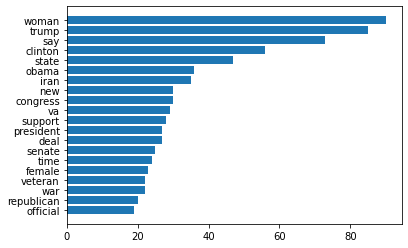

2016 fake news 


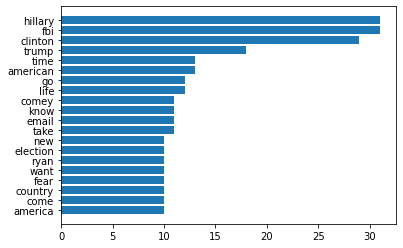

In [113]:
#barchart of top 20 words in 2016, for true and false 
%matplotlib inline
import matplotlib.pyplot as plt

# Get features and counts
feature_words = [token[0] for token in true_2016_nltk.most_common(20)]
frequency = [token[1] for token in true_2016_nltk.most_common(20)]

# feature_words_fake = [token[0] for token in fake_2016_nltk.most_common(20)]
# frequency_fake = [token[1] for token in fake_2016_nltk.most_common(20)]

# Create the figure
print('2016 true news ')
fig, ax = plt.subplots()
ax.barh(feature_words, frequency)
ax.invert_yaxis()
plt.savefig('bar_chart_true.png')
plt.show()


feature_words_fake = [token[0] for token in fake_2016_nltk.most_common(20)]
frequency_fake = [token[1] for token in fake_2016_nltk.most_common(20)]


# Create the figure
print('2016 fake news ')
fig, ax = plt.subplots()
ax.barh(feature_words_fake, frequency_fake)
ax.invert_yaxis()
plt.savefig('bar_chart_fake.png')
plt.show()

In [81]:
#2020 DATA SET, take lemmatized col and tokenize + custom stops 

text_nltk2020 = Counter()

for article in shuffle_df2020['lemma_str']:
    for token in word_tokenize(article.strip().lower()):
        if token not in stops and token.isalpha and token.isnumeric()==False and punct_digit.match(token) is None: #excludes punct
            text_nltk2020[token] +=1

word_stats(text_nltk2020)

Total words in the text: 3603

Top X num words by frequency:
say 	 51
trump 	 24
president 	 21
mugabe 	 19
year 	 18
people 	 17
house 	 16
republican 	 16
edwards 	 16
woman 	 15
know 	 15
south 	 15
reuters 	 14
policy 	 14
child 	 14
party 	 14
vote 	 13
presidential 	 13
candidate 	 13
state 	 13


In [82]:
text_nltk2020.most_common(10)

[('say', 51),
 ('trump', 24),
 ('president', 21),
 ('mugabe', 19),
 ('year', 18),
 ('people', 17),
 ('house', 16),
 ('republican', 16),
 ('edwards', 16),
 ('woman', 15)]

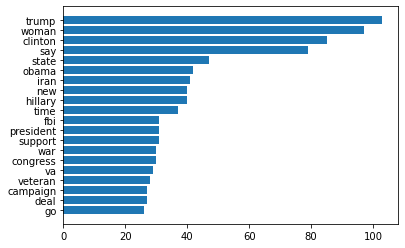

In [114]:
#barchart of top 20 words in 2016
%matplotlib inline
import matplotlib.pyplot as plt

# Get features and counts
feature_words = [token[0] for token in text_nltk.most_common(20)]
frequency = [token[1] for token in text_nltk.most_common(20)]

# Create the figure
fig, ax = plt.subplots()
ax.barh(feature_words, frequency)
ax.invert_yaxis()
plt.savefig('bar_chart2016_total.png')
plt.show()

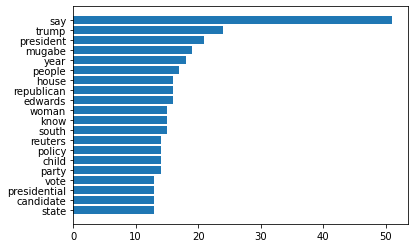

In [84]:
#barchart of top 20 words in 2020
%matplotlib inline

# Get features and counts
feature_words = [token[0] for token in text_nltk2020.most_common(20)]
frequency = [token[1] for token in text_nltk2020.most_common(20)]

# Create the figure
fig, ax = plt.subplots()
ax.barh(feature_words, frequency)
ax.invert_yaxis()
plt.savefig('bar_chart.png')
plt.show()

In [89]:
#word cloud
#fig, ax = plt.subplots()

max_count = max(text_nltk.values())
for i, token_data in enumerate(text_nltk.most_common(20)):
    ax.text(
        x=0.5, 
        y=1-i/20, 
        s=token_data[0], 
        size=50*token_data[1]/max_count,
        ha='center',
        va='center'
    )


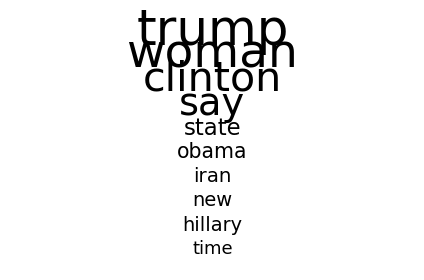

In [90]:
#word cloud
fig, ax = plt.subplots()
max_count = max(text_nltk.values())
for i, token_data in enumerate(text_nltk.most_common(10)):
    ax.text(
        x=0.5, 
        y=1-i/10, 
        s=token_data[0], 
        size=50*token_data[1]/max_count,
        ha='center',
        va='center'
    )
plt.axis('off')
plt.tight_layout()
plt.savefig('word_cloud2016.png')
plt.show()

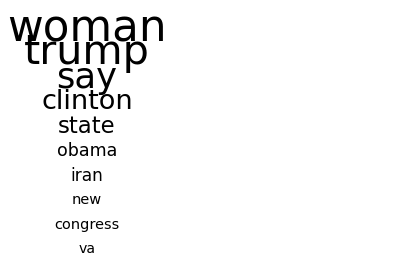

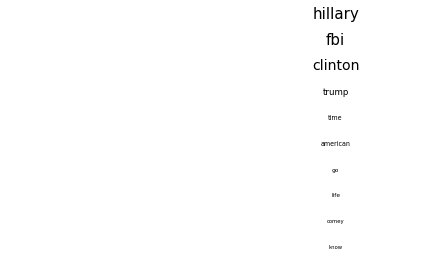

In [112]:
fig, ax = plt.subplots()
for j, token_data in enumerate(true_2016_nltk.most_common(10)):
    ax.text(
        x=0.2, 
        y=1-j/10, 
        s=token_data[0], 
        size=50*token_data[1]/max_count,
        ha='center',
        va='center'
    )
plt.axis('off')
plt.tight_layout()
plt.savefig('word_cloud_true.png')
plt.show()

fig, ax = plt.subplots()
for k, token_data in enumerate(fake_2016_nltk.most_common(10)):
    ax.text(
        x=0.8, 
        y=1-k/10, 
        s=token_data[0], 
        size=50*token_data[1]/max_count,
        ha='center',
        va='center'
    )
plt.axis('off')
plt.tight_layout()
plt.savefig('word_cloud_false.png')
plt.show()

In [101]:
# Plotting function
def plot_compare(X, labels, title, reduce=True, alpha=0.2):
    '''
    Takes an array of object data, a set of cluster labels, and a title string
    Reduces dimensions to 2 and plots the clustering.
    Returns nothing.
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns
    from   sklearn.decomposition import TruncatedSVD

    if reduce:
        # TruncatedSVD is fast and can handle sparse inputs
        # PCA requires dense inputs; MDS is slow
        coordinates = TruncatedSVD(n_components=2).fit_transform(X)
    else:
        # Optionally handle 2-D inputs
        coordinates = X
    
    # Set up figure
    fig, ax = plt.subplots(figsize=(12,6))

    # Unlabeled data
    plt.subplot(121) # 1x2 plot, position 1
    plt.scatter(
        coordinates[:, 0], 
        coordinates[:, 1], 
        alpha=alpha, # Set transparency so that we can see overlapping points
        linewidths=0 # Get rid of marker outlines
    )
    plt.title("Unclustered data")

    # Labeled data
    plt.subplot(122)
    sns.scatterplot(
        x=coordinates[:, 0], 
        y=coordinates[:, 1],
        hue=labels,
        alpha=alpha,
        palette='viridis',
        linewidth=0
    )
    plt.title(title)
    plt.show()

In [102]:
# Pull sample texts from each label set
def pull_samples(texts, labels, n=3):
    '''
    Takes lists of texts and an array of labels, as well as number of samples to return per label.
    Prints sample texts belonging to each label.
    '''
    texts_array = np.array(texts) # Make the input text list easily addressable by NumPy
    for label in np.unique(labels): # Iterate over labels
        print("Label:", label)
        sample_index = np.where(labels == label)[0] # Limit selection to current label
        print("Number of texts in this cluster:", len(sample_index), '\n')
        chosen = np.random.choice(sample_index, size=n) # Sample n texts with this label
        for choice in chosen:
            print("Sample text:", choice)
            print(texts_array[choice], '\n') # Print each sampled text
        print("###################################")

Matrix shape:  (500,)


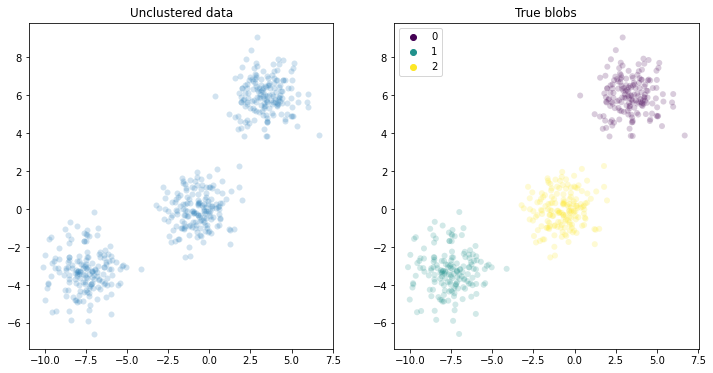

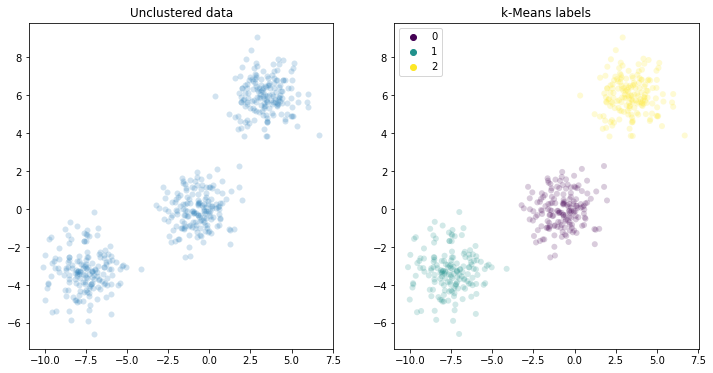

In [103]:
import os
from   sklearn.cluster import KMeans, SpectralClustering
from   sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from   sklearn.datasets import make_blobs
#k-means clustering
n_samples = 500 #this many pts per blob
X, y = make_blobs(n_samples = 500)

y_kmeans = KMeans(n_clusters=3).fit_predict(X)

print("Matrix shape: ", y_kmeans.shape)

plot_compare(X, y, 'True blobs', reduce=False)
plot_compare(X, y_kmeans, 'k-Means labels', reduce=False)

In [106]:
# y_kmeans = KMeans(n_clusters=5).fit_predict(lemm_matrix) #perform clustering with n_clusters = 3


# plot_compare(lemm_matrix, y_kmeans, 'k-Means labels', reduce=True)

# print("Matrix shape:", y_kmeans.shape)

In [105]:
# # text_df['text'][6330]
# a = lemmatizer(text_df['text'][6330])
# type(a)

# a_str = ''
# for token in a:
#     a_str+=(token) + ' '

# #type(a_str)
# print(a_str)

# text_df['lemmatized_text'] = text_col.apply(lemmatizer)
# len(text_df['lemmatized_text'])


#tokens = [token.orth_ for token in tokenizer(text)]

In [ ]:
#print(text_df['lemmatized_text'][2])

In [ ]:
# for article_text in text_col:
#     temp_str = ''
#     #index_num = text_col.index(article_text)
    
#     temp_lemm = lemmatizer(article_text)

from spacy import displacy
for article in text_col[0:5]:
    doc= nlp(article)
    displacy.render(doc, style='dep', options={'distance':100}) # Dependency parse